In [10]:
from models import BURGERS

from torch import nn

%config InlineBackend.figure_format = 'retina'

## **Burgers' Equation**

Solving the Burgers' equation using a PINN

Burgers': $\mathcal{N}[u(x, t)]=u_t+u u_x-\nu u_{x x}$

with conditions: 
\begin{aligned}
u(x, 0)=-\sin (\pi x), \quad &x \in[-1,1] . \\
u(-1, t)=0, \quad u(1, t)=0, \quad &t \in[0,1]
\end{aligned}

In [11]:
model = BURGERS(n_hidden_layers=4, n_neurons_per_layer=20, activation = nn.Tanh)

# print number of trainable parameters
num_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nNumber of trainable parameters: {num_trainable_params}")

Using device: cuda

Domain setup complete with 10000 collocation points, 100 initial points, and 100 boundary points.

Number of trainable parameters: 1761


In [12]:
losses = model.train(adam_epochs=1000, lbfgs_epochs=50000, verbose = True)

Starting Adam optimization...
Adam - Epoch 0/1000, Loss: 1.152081e+00
Adam - Epoch 100/1000, Loss: 3.481735e-01
Adam - Epoch 200/1000, Loss: 1.684255e-01
Adam - Epoch 300/1000, Loss: 1.480944e-01
Adam - Epoch 400/1000, Loss: 1.436406e-01
Adam - Epoch 500/1000, Loss: 1.353121e-01
Adam - Epoch 600/1000, Loss: 1.199102e-01
Adam - Epoch 700/1000, Loss: 1.071134e-01
Adam - Epoch 800/1000, Loss: 1.023217e-01
Adam - Epoch 900/1000, Loss: 9.910236e-02
Adam - Epoch 999/1000, Loss: 9.619679e-02

Starting L-BFGS optimization...
L-BFGS - Iteration 100, Loss: 4.880093e-02
L-BFGS - Iteration 200, Loss: 1.629278e-02
L-BFGS - Iteration 300, Loss: 8.452814e-03
L-BFGS - Iteration 400, Loss: 4.508017e-03
L-BFGS - Iteration 500, Loss: 3.218252e-03
L-BFGS - Iteration 600, Loss: 2.316433e-03
L-BFGS - Iteration 700, Loss: 1.715709e-03
L-BFGS - Iteration 800, Loss: 1.164029e-03
L-BFGS - Iteration 900, Loss: 8.674615e-04
L-BFGS - Iteration 1000, Loss: 7.081933e-04
L-BFGS - Iteration 1100, Loss: 5.468100e-04
L-

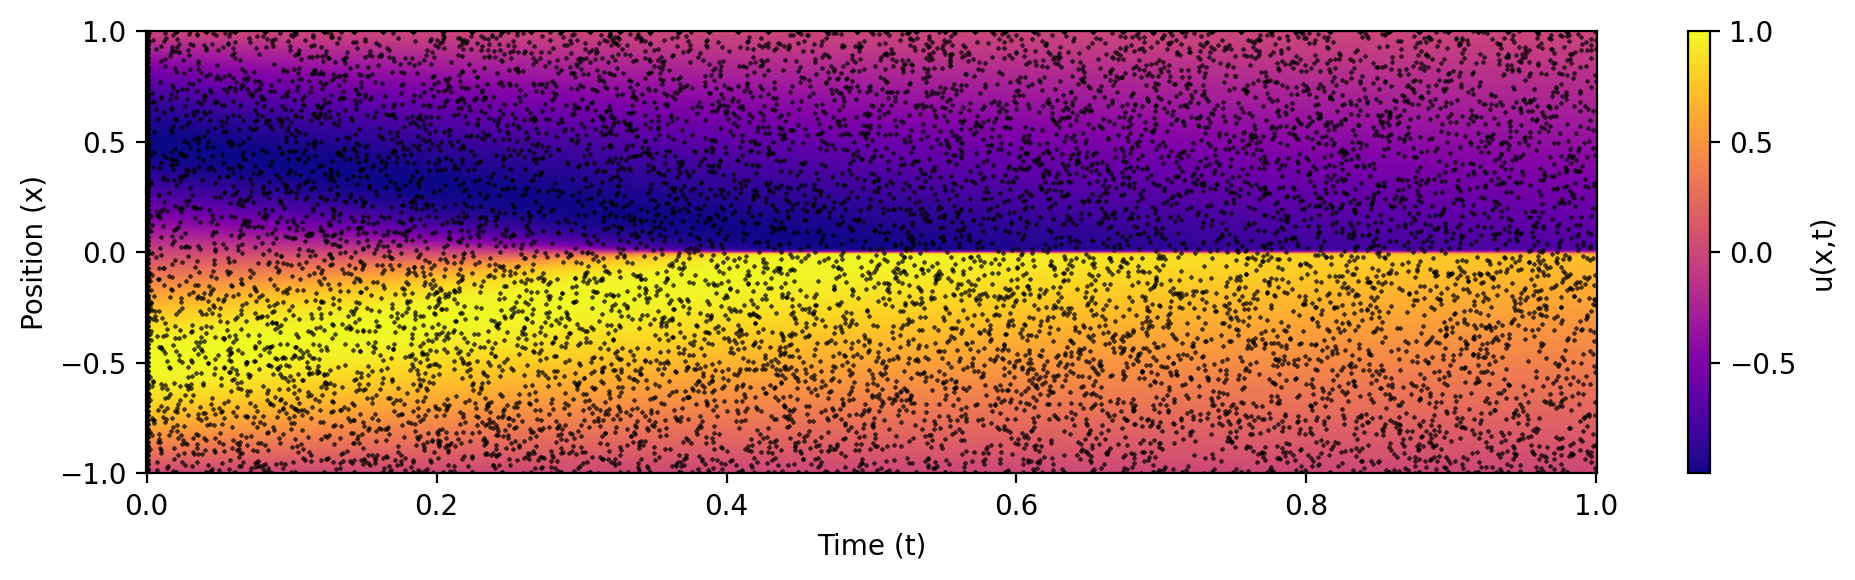

In [13]:
model.plot_spacetime()

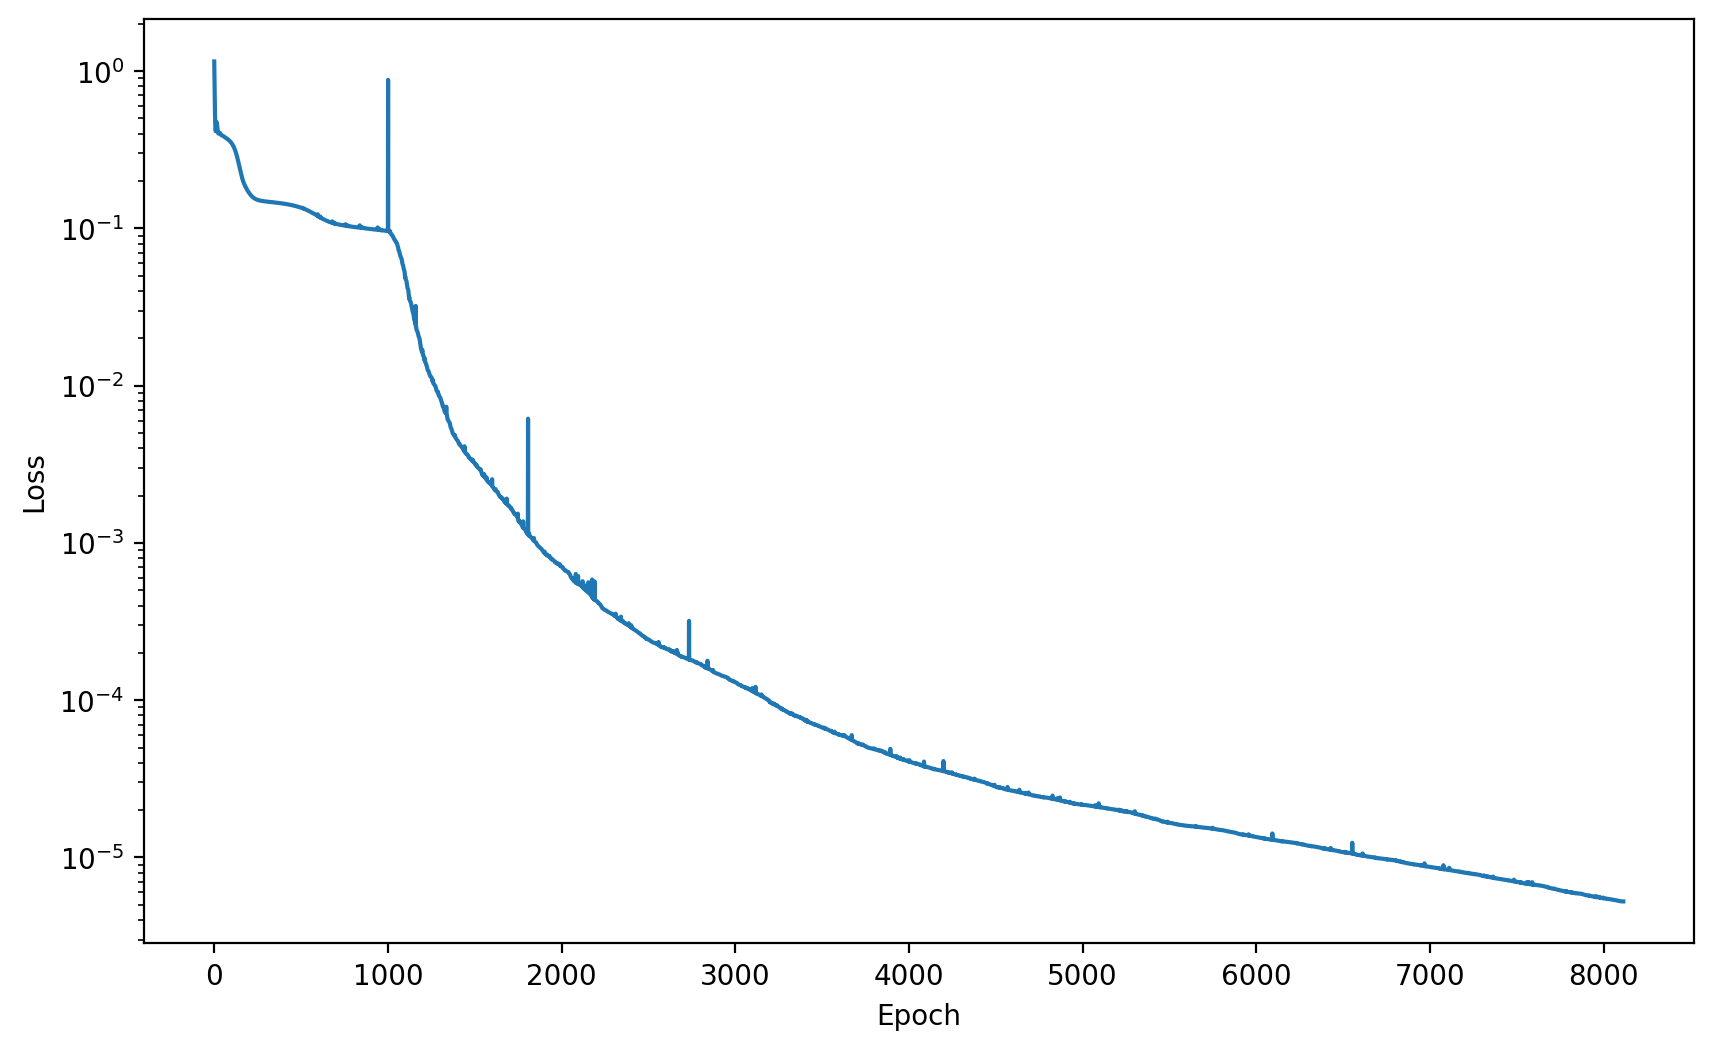

In [14]:
model.plot_losses(losses)

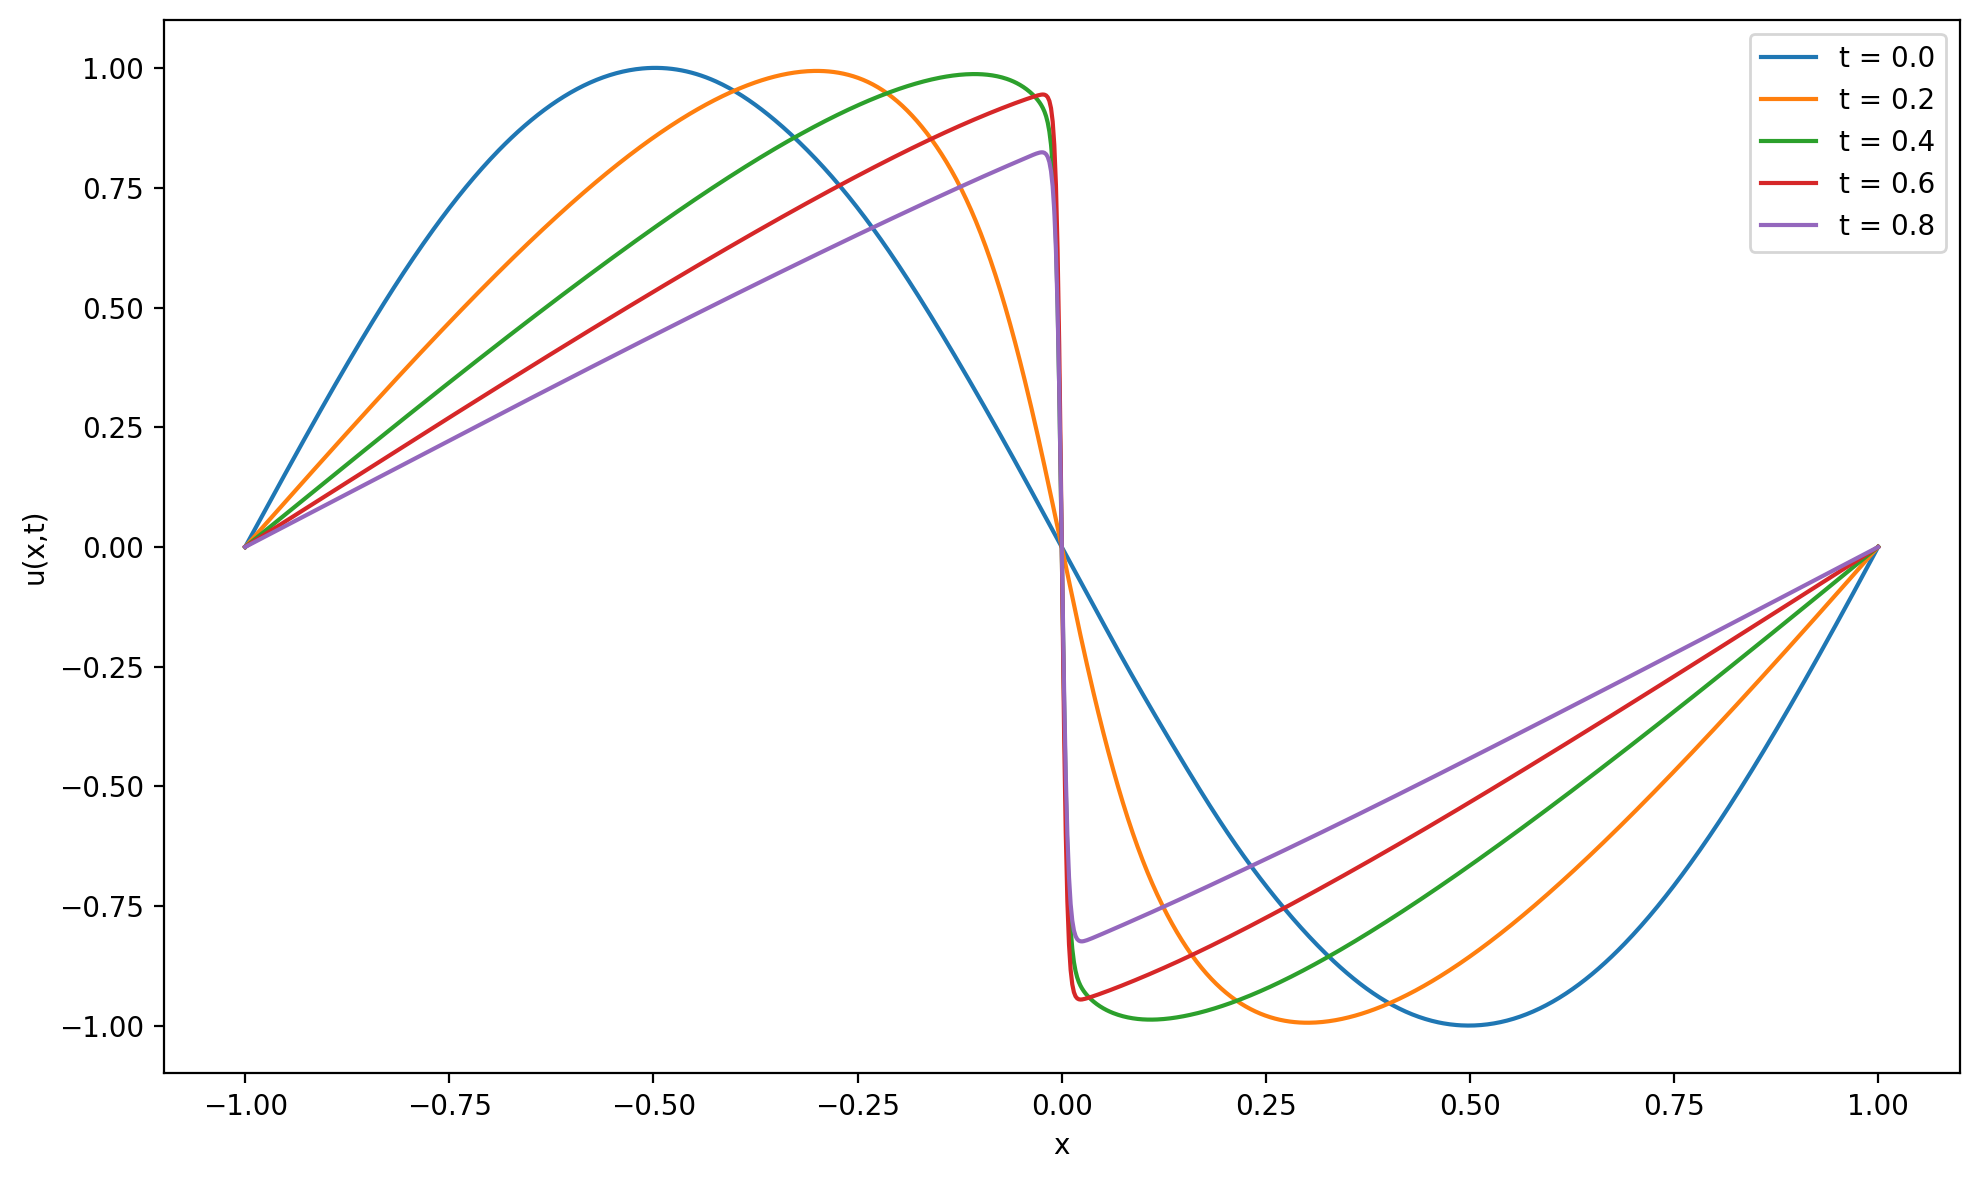

In [15]:
model.plot_profiles()